# <img src="./assets/course-icon.png" style="height:50px;display:inline">  Deep Learning Math
---

## 图论（graph Theory）

图论在深度学习中用于处理和分析结构化数据。图的表示方式（邻接矩阵和邻接列表）使得我们能够有效地编码复杂关系和连接信息。图的全局属性，如连通性和最短路径，帮助理解图的整体结构，优化模型中的路径规划和连通性分析。

节点的中心性指标（度中心性、特征向量中心性等）用于识别图中关键节点，提高图神经网络（GNN）模型的性能。图的向量化方法（节点和边的嵌入）将图的结构信息转化为可处理的向量形式，使得图数据能够被深度学习模型高效利用。这些技术在社交网络分析、推荐系统和分子结构预测等应用中发挥了重要作用。







---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* 图的表示(Graph Representation)
    * 邻接矩阵(Adjacency Matrix)
    * 邻接列表(Adjacency List)

* 图的全局属性(Global Attributes)
    * 连通性(Connectivity)
    * 直径与最短路径(Diameter and Shortest Path)
    * 跳数(Hop Count / n-hop)
    * 同构性(Isomorphism)
    * 完备性(Completeness)

* 图的节点表示(Node Representation)
    * 度中心性(Degree Centrality)
    * 特征向量中心性(Eigenvector Centrality)
    * 中介中心性(Betweenness Centrality)
    * 接近中心性(Closeness Centrality)

* 图的边属性(Edge Attributes)

* 图的向量化(Embedding of the Graph)
    * 节点的向量化(Node Embedding)
        * Lookup Table
        * 随机游走(Random Walk)
    * 全局信息的向量化(Global Information Embedding)
    * 边的向量化(Edge Embedding)

## <img src="https://img.icons8.com/?size=100&id=zCqLOIcK9Lpw&format=png&color=000000" style="height:50px;display:inline"> 图的表示
---

首先让我们确定什么是图，图代表了一组实体（节点）之间的关系（边）。用于表示图的主要属性有三个：

（1）Vertex/Node 顶点（或节点）属性。例如，节点的身份、邻居的数量等。

（2）Edge/Link 边（或链接）属性。例如，边的身份、节点的关系等。

（3）Global 全局（或主节点）属性。例如，节点的数量、最长的路径等，表示整张图的主要特征。

为了进一步描述每个节点、边或整个图，可以用向量的形式来存储信息，即把点、边和全局都用向量进行表示，如图所示。

<center><img src="./assets/graphrep.png" style="height:300px"></center> <br>
 


In [ ]:
import torch
from torch_geometric.data import Data

# 定义图的节点和边
# x 是形状为 [num_nodes, num_node_features] 的特征矩阵
x = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float)

# edge_index 定义了节点之间的连接
# 它是一个形状为 [2, num_edges] 的二维张量
edge_index = torch.tensor([[0, 1, 2, 0],
                           [1, 0, 1, 2]], dtype=torch.long)

# 增加全局特征
# u 是形状为 [num_graphs, num_global_features] 的张量
u = torch.tensor([[1, 2, 3]], dtype=torch.float)

# 创建 Data 对象
data = Data(x=x, edge_index=edge_index, u=u)

print(data)

# 输出图的属性
print("特征矩阵 (x):")
print(data.x)
print("边索引 (edge_index):")
print(data.edge_index)
print("全局特征 (u):")
print(data.u)


Data(x=[3, 2], edge_index=[2, 4], u=[1, 3])
特征矩阵 (x):
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
边索引 (edge_index):
tensor([[0, 1, 2, 0],
        [1, 0, 1, 2]])
全局特征 (u):
tensor([[1., 2., 3.]])


## 邻接矩阵/列表（Adjacency Matrix/List）

邻接矩阵 (Adjacency Matrix) 是表示顶点之间相邻关系的矩阵, 如图所示。设 $G=(V, E)$ 是一个图, 其中 $V=\left\{v_1, v_2, \cdots, v_n\right\}$ 。 $G$ 的邻接矩阵是一个 $n$ 阶方阵且具有以下性质。

(1) 对无向图而言, 邻接矩阵一定是对称的, 有向图则不一定如此。

(2) 在无向图中, 任一顶点 $i$ 的度为第 $i$ 列（或第 $i$ 行）所有非零元素的个数, 在有向图中顶点 $i$ 的出度为第 $i$ 行所有非零元素的个数, 而入度为第 $i$ 列所有非零元素的个数。

(3) 用邻接矩阵法表示图共需要 $n^2$ 个空间, 由于无向图的邻接矩阵一定具有对称关系,所以扣除对角线为零外, 仅需要存储上三角形或下三角形的数据即可, 因此仅需要 $n(n-1) / 2$个空间。即便如此, 当图结构太大时, 邻接矩阵存储的资源占用依然是一个问题。
<center><img src="./assets/AdjacencyMatrix.png" style="height:250px"></center> <br> 

此外，除了使用0、1来表示节点之间是否存在关系以外，也可以用权重的方法进行节点关系的表示，如果关系强，则赋予更高的数值，反之亦然。如下图所示，周瑜和小乔是夫妻，所以可以拥有更高的权重。
<center><img src="./assets/AdjacencyMatrixWeighted.png" style="height:250px"></center> <br>  

表示稀疏矩阵的一种优雅而有效的记忆方式是邻接列表（adjacency list）。例如, 如果节点 $n_i$ 和 $n_j$ 之间的边 $e_k$ 存在连通性, 那么把元组 $(i, j)$ 作为邻接列表的第 $k$ 个条目。这样可以避免在图的不连接部分进行计算和存储无效信息。为了使这一概念具体化, 请读者观察邻接列表的表示示例, 如下图所示。
<center><img src="./assets/AdjacencyList.png" style="height:350px"></center> <br>   


## <img src="https://img.icons8.com/?size=100&id=DfraGfozBS5c&format=png&color=000000" style="height:50px;display:inline"> 图的全局属性
--- 

### 有向图和无向图(Directed/Undirected）

为了更清晰的解释图数据的各个属性，以三国时期的人物关系为例子进行说明。根据图结构中的边是否有方向，可以把图数据分成两类。边没有方向的图称为无向图；反之则为有向图。
<center><img src="./assets/Directed.png" style="height:300px"></center> <br>    



### 图的连通性（Connectivity of Graphs）
在图论中, 连通图基于连通的概念。在一个无向图 $G$ 中, 若从顶点 $i$ 到顶点 $j$ 有路径相连 (当然从 $j$ 到 $i$ 也一定有路径), 则称 $i$ 和 $j$ 是连通的。如果 $G$ 是有向图, 那么连接 $i$ 和 $j$ 的路径中所有的边都必须同向。如果图中任意两点都是连通的, 那么图被称作连通图; 如果此图是有向图, 则称为强连通图。
<center><img src="./assets/ConnectivityofGraphs.png" style="height:600px"></center> <br>   

### 图的直径和最短路径(Diameter and Shortest Path)
图中任意两节点的相连方式有很多，可能直接相连，也可能通过其它节点间接相连。而图的最短路径（Shortest Path）指的是所以连接方式中，最短的那种方式。图的直径（Graph Diameter）定义为图中最长的最短路径的长度。
<center><img src="./assets/shortest.png" style="height:300px"></center> <br>    

如图所示，刘备和关羽两节点之间可以直接相连，也可以通过张飞相连。此图的最短路径有三个，分别是张飞–>关羽，关羽–>刘备，刘备–>张飞，而图的直径是刘备–>黄忠。

### 图的跳数（n-hop）

在图论中，跳数（Hop Count）指的是两个节点之间的最短路径中的边的数量。换句话说，跳数是指从一个节点到另一个节点需要经过多少条边。

跳数的计算方法

直接相邻（1跳）：如果两个节点之间直接相连，则跳数为1。

间接相连（n跳）：如果两个节点之间没有直接连接，但通过其他节点相连，则跳数为中间节点的数量加1。

**六度空间理论**（Six Degrees of Separation） 理论指出：你和任何一个陌生人之间所间隔的人不会超过六个（6-hop），也就是说，最多通过6个中间人你就能够认识任何一个陌生人。

### 同构性（Graph Isomorphism）

图同构指的是两个图在本质上是相同的，即它们的结构可以通过重新标记顶点使得一个图转换成另一个图。给定两个图 $G=\left(V_G, E_G\right)$ 和 $H=\left(V_H, E_H\right)$ ，我们说 $G$ 和 $H$ 是同构的，如果存在一个双射函数 $f: V_G \rightarrow V_H$ ，使得对于所有的边 $(u, v) \in E_G$ ，都有 $(f(u), f(v)) \in E_H$ 。这意味着，同构的两个图在结构上是完全相同的，只是顶点的标签可能不同。

同构性的快速筛查

1. 顶点数和边数的比较：

首先检查两个图的顶点数和边数是否相同。如果不同，两个图不可能是同构的。

2. 邻接矩阵的比较：

生成两个图的邻接矩阵，并尝试通过行和列的重新排列来匹配两个邻接矩阵。如果能够找到一种排列方式使得两个邻接矩阵相同，那么这两个图是同构的。


注意，这些检查方法可以帮助快速排除明显非同构的图。但是，由于图结构的复杂性，特别是大规模图，这些特征无法完全描述图的所有细节。因此，仅依靠这些方法无法百分之百确保两个图的同构性。

图同构问题是计算机科学中一个经典的挑战。虽然有许多算法可以用于图同构性检查（VF2 算法，Ullmann 算法，Nauty，Weisfeiler-Lehman Test等等），但目前没有已知的算法可以百分百地解决所有情况下的图同构问题。

### 完备性（Completeness）

图的完备性是指图在某些特定条件下是否能够充分表达某种信息。可以从局部完备性和全局完备性两方面进行讨论。


局部完备性（Local Completeness）是指图中的每个子图（局部结构）是否能够完全捕捉到与该子图相关的信息。在图神经网络（GNN）中，局部完备性意味着每个节点及其邻居节点的信息在节点的表示学习中是否被充分利用。局部完备性的实现对GNN有以下影响：

- 节点表示的准确性：如果图在局部是完备的，GNN可以更准确地捕捉每个节点及其局部邻域的信息，从而提高节点表示的准确性。
- 信息传播的有效性：局部完备性确保信息在局部结构内有效传播，使得每个节点能从其邻居节点中获取到完整的信息，这对信息聚合和更新过程非常重要。
- 鲁棒性：在局部完备的图中，节点表示对局部扰动（如某些节点或边的丢失）具有更强的鲁棒性，因为每个节点的表示能够依赖于其多个邻居的信息。


全局完备性（Global Completeness）是指整个图在全局范围内是否能够完全表达图的结构信息。在GNN中，全局完备性意味着整个图的结构信息在网络训练和推理过程中是否被充分利用。全局完备性的实现对GNN有以下影响：

- 图级任务的性能：对于图分类或图回归等任务，全局完备性确保GNN能够捕捉到整个图的结构信息，从而提高模型在图级任务中的性能。
- 全局信息的传播：全局完备性确保全局信息能够在整个图中有效传播，使得远距离节点之间的信息能够互相影响，从而提升GNN对全局依赖关系的建模能力。
- 表达能力：全局完备的图能够更好地表示复杂的全局结构，提高GNN在处理复杂图结构时的表现。



完备性也可以放到具体的场景下进行讨论，例如：大家都知道 “两点确定一线，三点确定一平面”，那么多少个变量可以确定一个分子图呢？

在化学中，一个分子由原子及其连接关系（键）确定。具体来说，确定一个分子通常需要以下信息：

- 原子的种类和数量：分子中有多少种类的原子，每种原子的数量是多少。
- 原子间的连接方式：哪些原子之间存在化学键，以及这些化学键的类型（单键、双键等）。
- 空间结构：原子，电子等在三维空间中的排布和相对位置。

这些信息共同决定了一个分子的结构和性质。可以类比地说，这些信息就是确定一个分子的“变量”。

将这一思路应用到图的完备性上，我们可以将图中的节点和边比作分子中的原子和化学键。确定一个图同样需要一定的“变量”，具体包括：

- 节点的种类和数量：图中有多少种类的节点，每种节点的数量是多少。
- 节点间的连接方式：哪些节点之间存在边，以及这些边的类型（无向边、有向边、加权边等）。
- 图的全局结构：节点和边在图中的整体空间排布和关系。


## <img src="https://img.icons8.com/?size=100&id=g5NKcBykEi6f&format=png&color=000000" style="height:50px;display:inline"> 图的节点属性
--- 

### 图的度中心性(Degree Centrality)

节点的度（Node degree）

（1）无向图节点的度为：与该节点相关联边的数目；

（2）有向图节点的出度为：由该节点发出的边的数目；

（3）有向图的节点的入度为：以该节点为终点的边的数目；

度中心性是在网络分析中刻画节点中心性（Centrality）的最直接度量指标。一个节点的节点度越大就意味着这个节点的度中心性越高，该节点在网络中就越重要。通常，为了便于比较或者进行其它计算，需要将度中心性进行标准化。标准化的方式通常是每个顶点的度除以图中可能的最大度数，即 N-1，其中 N 表示图中的顶点个数，标准化公式为：

$$
\text { norm }(\text { degree })=\frac{\text { degree }}{N-1}
$$

如下图所示，节点刘备的中心性等于5/6，节点于禁的中心性等于0，节点关羽的中心性等于2/6。.
<center><img src="./assets/DegreeCentrality.png" style="height:250px"></center> <br>     

### 图的特征向量中心性(Eigenvector Centrality)
在图论中，特征向量中心性是一种度量节点重要性的方法。它不仅考虑一个节点的度数，还考虑与该节点相连的节点的中心性。简而言之，一个节点的特征向量中心性不仅取决于它的邻居数量，还取决于它邻居的中心性。现在用一个长度为5的向量来表示节点x的信息, A来表示临界矩阵，如下图
<center><img src="./assets/graphvecrep.png" style="height:250px"></center> <br>   

当 x 和 A 相乘时，结果是邻接矩阵对每个节点的邻居节点特征进行重新分配。

$$
\boldsymbol{A} \times \boldsymbol{x}=\left[\begin{array}{lllll}
0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 \\
0 & 0 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 & 0
\end{array}\right]\left[\begin{array}{l}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}\right]=\left[\begin{array}{l}
0 \cdot x_1+1 \cdot x_2+0 \cdot x_3+0 \cdot x_4+0 \cdot x_5 \\
1 \cdot x_1+0 \cdot x_2+0 \cdot x_3+0 \cdot x_4+0 \cdot x_5 \\
0 \cdot x_1+0 \cdot x_2+0 \cdot x_3+1 \cdot x_4+1 \cdot x_5 \\
0 \cdot x_1+0 \cdot x_2+1 \cdot x_3+0 \cdot x_4+1 \cdot x_5 \\
0 \cdot x_1+0 \cdot x_2+1 \cdot x_3+1 \cdot x_4+0 \cdot x_5
\end{array}\right]
$$

根据线性代数中关于特征值和特征向量的知识, 特征向量中心性是通过求解以下特征值问题得到的： $\boldsymbol{A} * \boldsymbol{x}=\lambda * \boldsymbol{x}$ 。其中， $\lambda$ 是特征值， $\boldsymbol{x}$ 是对应的特征向量。



### 图的中介中心性(Betweenness Centrality)
中介中心性的思想是：如果一个成员位于其它成员的多条最短路径上，那么该成员就是核心成员，就具有较大的中介中心性。它是指网络中经过某点并连接这两点的最短路径占这两点之间的最短路径线总数之比。以经过某个节点的最短路径数目来刻画节点的重要性指标，公式如下：

$$
B C=\sum_{s, t \in i} \frac{d_{s t}(i)}{d_{s t}}
$$

其中 $d_{s t}$ 表示 $s$ 到 $t$ 的最短路径数量, $d_{s t}(i)$ 表示从 $s$ 到 $t$ 最短路径中经过 $i$ 节点的数量。举例计算下图节点刘备的中介中心性：节点张飞分别到其它五个节点的最短路径一共有五条，其中有四条都经过节点刘备（即，只有张飞–>关羽这条不经过）。同理计算其它四个节点的情况，它们的情况相同，都是分别到其它五个节点的最短路径一共有五条，其中全部都需要经过节点刘备。所以节点刘备的中介中心性等于$\frac{4+5+5+5+5}{5+5+5+5+5}=\frac{24}{25}$

<center><img src="./assets/BetweennessCentrality.png" style="height:250px"></center> <br>      


### 图的接近中心性(Closeness Centrality)

图的接近中心性反映在网络中某一节点与其它节点之间的接近程度。如果节点到图中其它节点的最短距离都很小，那么它的接近中心性就很高。相比中介中心性，接近中心性更接近几何上的中心位置。
如果进行归一化处理，就是求这个节点到其它所有节点的平均最短距离，公式如下：

$$
d_i=\frac{\sum_{j \in i} d_{i j}}{n-1}
$$

一个节点的平均最短距离越小, 那么这个进行的接近中心性就越大。如果节点 $i$ 和节点 $j$之间没有路径可达, 则定义 $d_{i j}$ 为无穷大, 其倒数为 0 。
$$
C C_i=\frac{1}{d_i}=\frac{n-1}{\sum_{j \in i} d_{i j}}
$$

其中 $C C_i$ 表示 $i$ 节点的接近中心性, $d_{i j}$ 表示 $i$ 到 $j$ 的最短距离。 $C C_i$ 值越大, $i$ 点的接近中心性越大。

下面通过代码的形式计算图节点的相关属性

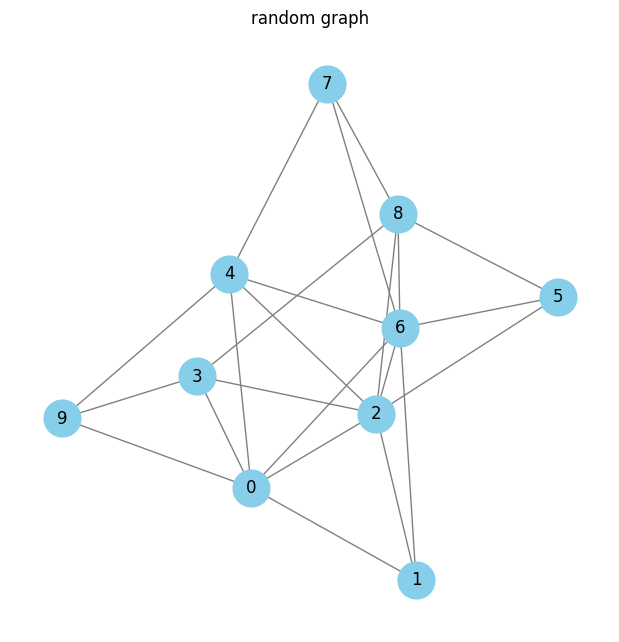

In [ ]:
import torch
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt
import random

# 生成节点和边
num_nodes = 10
edge_prob = 0.5

# 生成边列表
edges = []
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if random.random() < edge_prob:
            edges.append((i, j))

# 创建图数据
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# 创建PyTorch Geometric数据对象
data = Data(edge_index=edge_index)

# 可视化图
G = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title("random graph")
plt.show()


In [ ]:
# 计算接近中心性
closeness_centrality = nx.closeness_centrality(G)

# 计算中介中心性
betweenness_centrality = nx.betweenness_centrality(G)

# 计算特征向量中心性
eigenvector_centrality = nx.eigenvector_centrality(G)

# 计算度中心性
degree_centrality = nx.degree_centrality(G)

import pandas as pd

# 整理结果
centrality_measures = pd.DataFrame({
    '节点': list(G.nodes),
    '接近中心性': [closeness_centrality[node] for node in G.nodes],
    '中介中心性': [betweenness_centrality[node] for node in G.nodes],
    '特征向量中心性': [eigenvector_centrality[node] for node in G.nodes],
    '度中心性': [degree_centrality[node] for node in G.nodes]
})
 

centrality_measures

,节点,接近中心性,中介中心性,特征向量中心性,度中心性
0,0,0.750000,0.101852,0.379320,0.666667
1,1,0.600000,0.000000,0.248528,0.333333
2,2,0.818182,0.143519,0.438621,0.777778
3,3,0.642857,0.055556,0.264186,0.444444
4,4,0.692308,0.083333,0.329732,0.555556
5,6,0.818182,0.157407,0.430300,0.777778
6,9,0.562500,0.009259,0.193775,0.333333
7,5,0.562500,0.000000,0.235754,0.333333
8,8,0.692308,0.078704,0.315166,0.555556
9,7,0.600000,0.009259,0.214075,0.333333


上述图属性可是作为图节点的特征向量，如下代码所示

In [ ]:
# 整理结果并创建节点特征向量
node_features = []
for node in G.nodes:
    features = [
        closeness_centrality[node],
        betweenness_centrality[node],
        eigenvector_centrality[node],
        degree_centrality[node]
    ]
    node_features.append(features)

# 转换为PyTorch张量
x = torch.tensor(node_features, dtype=torch.float)

# 创建PyTorch Geometric图数据
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
data = Data(x=x, edge_index=edge_index)

# 显示数据
print(data)

Data(x=[10, 4], edge_index=[2, 23])


## <img src="https://img.icons8.com/?size=100&id=cICYb0jD0JHv&format=png&color=000000" style="height:50px;display:inline"> 图边的属性
--- 

在图数据（Graph Data）中，边属性（Edge Attributes）是用于描述图中边（即节点间连接）的一些特征或信息的。建模边属性的方式有很多，具体取决于应用场景和分析目标。以下是一些常见的建模方式：

1. 权重（Weight）：

边的权重通常用于表示两个节点之间连接的强度、距离、成本或其他量化指标。比如，在社交网络中，边的权重可以表示朋友之间的互动频率；在路网中，边的权重可以表示道路的长度或通行时间。

2. 类型（Type）：

边的类型可以用于区分不同性质的连接。例如，在知识图谱中，可以有“朋友”、“同事”、“家人”等不同类型的关系。

3. 方向（Direction）：

在有向图中，边的方向表示关系的方向性，比如从节点A指向节点B的边表示A影响B。在建模时，需要明确记录每条边的起点和终点。

4. 时间戳（Timestamp）：

时间戳可以用于记录边的创建时间或活动时间，这对于动态图或时间序列图尤其重要。例如，在网络流量图中，每条边可以有一个时间戳表示该流量的发生时间。

5. 属性向量（Attribute Vector）：

边属性可以以向量形式存储，包含多个维度的信息。例如，在推荐系统中，一条边可以有多个属性如评分、评论、标签等。

6. 概率（Probability）：

在一些应用中，边的存在可能是概率性的。例如，在蛋白质相互作用网络中，边的概率可以表示两个蛋白质相互作用的可能性。

7. 容量（Capacity）：

在流网络（Flow Network）中，边的容量表示边所能承载的最大流量。例如，在交通网络中，边的容量可以表示道路的最大通行车辆数。

8. 多重边（Multiedges）：

在一些图中，两个节点之间可以有多条边，每条边有不同的属性。这种情况下，需要记录每条边的独立属性。

具体应用中，边属性的建模方式可能会结合上述几种方式。建模边属性的方式需要根据实际问题和数据特点进行选择和设计，以便有效地进行图分析和应用。

## <img src="https://img.icons8.com/?size=100&id=wPka4Cba02N4&format=png&color=000000" style="height:50px;display:inline"> 图的向量化
--- 
图数据的嵌入（Embedding）是将图结构中的节点、边或整个图转化为低维、连续、密集的向量表示的过程，这个过程也被成为向量化。这些向量表示（也称为嵌入向量）捕捉了图中的实体及其关系的本质特征，使得图数据可以被用于各种机器学习和数据分析任务。图嵌入技术的目的是保留原始图结构的信息，如节点间的邻接关系、路径长度和网络拓扑特性，同时将这些信息压缩到一个低维空间中。

### 节点的向量化(Node Embedding)
独热编码(one-hot)是节点向量化的一个基础方法。简单说就是用一个长度为节点数量的向量来表示节点信息，这个向量绝大部分元素都是零，只有一个位置是1，所以称为独热编码，如下图。

<center><img src="./assets/onehot.png" style="height:300px"></center> <br>      
 
这种表示方式虽然可以保证每个节点对应不同的向量，但是却有两个致命的缺点。

- （1）稀疏性，向量中绝大部分元素都是0。而且随着图大小的增加，稀疏性会跟着增加。
- （2）独热编码的形式不能抓取节点中的相关性，比如节点刘备跟其它五个节点都相连，但这个关系在独热编码的形式上是体现不出来的。实际上，这六位猛将都是有内在联系的。例如：刘关张在桃园结义过；张飞，关羽，马超，赵云和黄忠同为五虎上将；黄忠比较年迈，而赵云马超比较年轻；五虎上将的武力值都是顶配；马超和黄忠的出身较好等等。所以我们可以构建如下矩阵：

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the data based on the image
data = {
    "结义": [1, 1, 1, 0, 0, 0],
    "五虎": [0, 1, 1, 1, 1, 1],
    "年龄": [0.60, 0.55, 0.50, 0.40, 0.46, 0.72],
    "武力": [0.70, 0.99, 0.89, 0.92, 0.87, 0.81],
    "出身": [0.3, 0.3, 0.3, 0.4, 0.6, 0.7]
}

# Define the index (row labels)
index = ["刘备", "关羽", "张飞", "赵云", "马超", "黄忠"]

# Create the DataFrame
df = pd.DataFrame(data, index=index)

# Display the DataFrame
df


,结义,五虎,年龄,武力,出身
刘备,1,0,0.60,0.70,0.3
关羽,1,1,0.55,0.99,0.3
张飞,1,1,0.50,0.89,0.3
赵云,0,1,0.40,0.92,0.4
马超,0,1,0.46,0.87,0.6
黄忠,0,1,0.72,0.81,0.7


通过上述形式，我们把one-hot编码，从稀疏态变成了密集态，并且让相互独立向量变成了有内在联系的关系向量。上述这种将数据点转化为数值向量并使用矩阵表示的方法被称为查找表（Lookup Table）。这种方法通过为每个唯一的类别（如单词、标签或符号）分配一个固定长度的向量来工作，使得模型可以处理和分析这些数据。其中每行代表一个类别的向量表示。这个矩阵的大小由两个因素决定：一是唯一类别的数量，二是向量的维度。每个类别被分配一个唯一的索引，通过这个索引，我们可以在查找表中检索对应的向量。

### Lookup Table的定义方法

Lookup Table,一般来说可以有四种方式：自定义方法，有监督训练和无监督训练。

- 自定义方法最为简单，可以根据特定的数据特征和任务需求设计自定义嵌入方法。例如上图所表述形式就是一种自定义嵌入的方法。
- 有监督训练是生成合理的Lookup Table的另一种方式。具体来说，这个过程大体上分为几个简单的步骤：首先准备数据，确保每个数据点都有明确的输入特征和期望输出（即输入和对应的真值）。然后选择合适的GNNs模型，并进行训练，在这个阶段，模型会不断更新初始化的特征向量，尝试使用更新后的特征向量来预测正确的输出结果。训练完成后，用模型对所有可能的输入进行计算，模型计算得到的节点特征向量会被用来填充 Lookup Table。
- 无监督建模也是生成Lookup Table的常用方法，按数据类型可以分为序列和图两类，针对序列数据，即自然语言处理领域，生成Embedding常采用word2vec或类似算法（item2vec, doc2vec等）。针对图数据，也就是本书讲解的几何深度学习领域，生成Embedding的算法称为Graph Embedding，这类算法包括deepwalk、node2vec、struc2vec等，它们大多采用随机游走方式生成序列，下面以随机游走（Random Walk）为例进行介绍。

### 随机游走(Random Walk)

一个合理的向量化应该考虑相似性，即在图中相互临近的节点经过向量化后得到的向量也应该是相似的。也就是说，希望向量化之后的节点向量点乘之后的值接近于原图中的节点相似度。

$$
\operatorname{similarity}(u, v)=z_v^T z_u
$$

在随机游走算法中，当给定一个图和一个起始节点u，然后按照一定概率随机选择一个邻居节点，走到该处后再随机选择一个邻居，重复length次，到最终的终止节点v。length是一个超参数，是指随机游走的长度，如下图：

<center><img src="./assets/randomwalk.png" style="height:300px"></center> <br>    

在多次进行随机游走后，随机游走从起始节点u到终止节点的次数v，除以随机游走的总次数得到的概率值，实际上就可以用来表示相似度。

也就是说，从节点u到节点v的概率值，应该正比于节点u与节点v向量化之后的点乘结果。

这种方法有两个优点：

（1）相似度的定义结合了图的局部信息。

（2）只需要考虑随机游走的节点，不需要考虑全局信息，节省计算复杂度，效率高。

相关代码参考如下：

In [ ]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import pandas as pd

# 创建一个随机图
G = nx.erdos_renyi_graph(n=20, p=0.2, seed=42)

# 使用node2vec进行随机游走和训练
node2vec = Node2Vec(G, dimensions=32, walk_length=30, num_walks=200)
model = node2vec.fit(window=10, min_count=1)

# 获取每个节点的向量表示
embeddings = {str(node): model.wv[str(node)] for node in G.nodes()}

# 将嵌入转换为DataFrame
embeddings_df = pd.DataFrame(embeddings).T
embeddings_df.columns = [f'feature_{i}' for i in range(embeddings_df.shape[1])]
 
embeddings_df.head()

/home/arwin/anaconda3/envs/GNN/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 1): 100%|██████████| 200/200 [00:00<00:00, 1220.59it/s]


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,-0.118865,-0.487450,0.112956,0.389164,-0.018240,-0.409379,0.197791,-0.046330,-0.112694,-0.095146,...,0.302146,-0.249836,0.116794,-0.286903,0.002138,0.169646,-0.019117,-0.001418,-0.275610,-0.138597
1,-0.152091,-0.421093,0.096536,0.293265,0.094914,-0.274414,0.269710,0.095678,-0.086385,0.088134,...,0.343753,-0.329543,0.219653,0.048745,-0.219035,0.047592,-0.100183,-0.103925,-0.180907,-0.206220
2,0.040840,-0.057727,0.419276,0.137538,0.089489,-0.363980,0.242473,0.042467,0.104074,0.215268,...,0.430559,-0.315350,0.196646,0.044124,-0.096702,0.084132,0.225040,0.012377,-0.119396,-0.148297
3,-0.171008,-0.440018,0.091092,0.361489,-0.078338,-0.145103,0.447827,0.011616,-0.200889,0.041857,...,0.266206,0.136963,0.164407,-0.011901,-0.153485,0.301768,-0.015566,-0.045155,-0.240233,-0.008514
4,-0.010144,-0.004721,0.018429,0.004732,-0.002263,0.029166,-0.015379,-0.002620,0.028673,0.021092,...,0.020628,0.027938,-0.002109,0.009303,-0.019086,0.005310,-0.021644,-0.027169,-0.018438,-0.027989


###  图全局信息的向量化(Global Information Embedding)

图全局信息的向量化就是考虑怎么把整个图的信息映射成一个图向量。聚合是最简单的得到图向量的方法。就是简单的对图中所有的节点向量求和或求平均，并将这个结果作为图向量。这个方法虽然简单，但实际操作时，效果还是很好的。

另一种方法是在整个图的基础上，创造一个虚拟节点（virtual node），如下图所示。这个虚拟节点与全图所有节点相连。在图模型的训练阶段，这个虚拟节点会与全图的节点进行信息的交互，因此，它可以一定程度上表征全图信息。当训练结束后，可以取该虚拟节点的节点向量作为图向量。

<center><img src="./assets/Globalvirtualnode.png" style="height:300px"></center> <br>    

### 边的向量化(Edge Embedding)

至于边的向量化，也比较简单。可以简单的将该边相连的两个节点向量做聚合即可。除此之外，边的向量化也可以具体问题具体对待，即自定义的方式。举例：如果图结构表示的是一个分子，其中边表示两个原子是否相连。此时边的性质包括是否是双键、是否是环结构、是否是共价键、相连的原子是否是碳原子等等。那么可以用一个长度是四维的相连来表示这个边。例如 [1, 0, 0, 1] 可以表示这个边是一个连接碳原子的双键。